In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from vega_datasets import data

In [2]:
df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [3]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [4]:
df.date = pd.to_datetime(df.date)

In [5]:
df = df.set_index('date').sort_index()
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


## Use the above dataset for the following exercises:

## Resample by the day and take the average temperature. Visualize the average temperature over time.

<Axes: xlabel='date'>

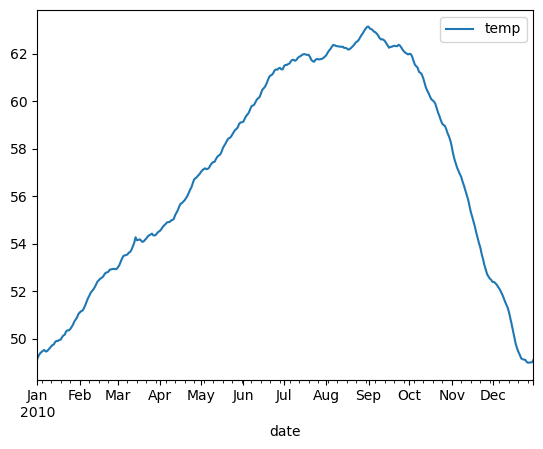

In [6]:
df.resample('d').mean().plot()

## Write the code necessary to visualize the minimum temperature over time.

<Axes: xlabel='date'>

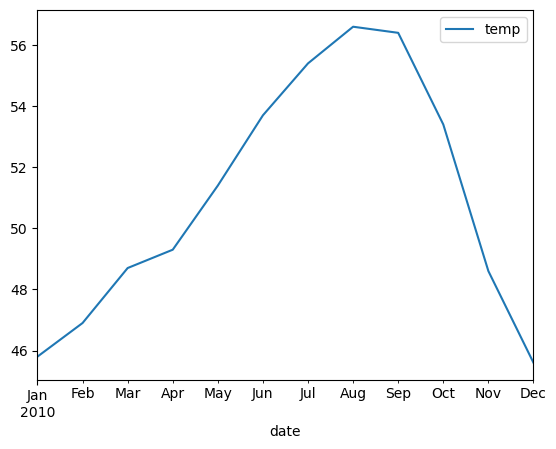

In [7]:
df.resample('m').min().plot()

## Write the code necessary to visualize the maximum temperature over time.

<Axes: xlabel='date'>

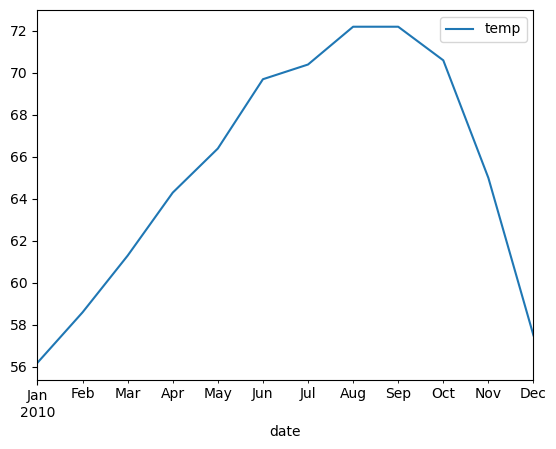

In [8]:
df.resample('m').max().plot()

## Which month is the coldest, on average?

In [9]:
(df.resample('m').mean()).idxmin()

temp   2010-01-31
dtype: datetime64[ns]

## Which month has the highest average temperature?

In [10]:
(df.resample('m').mean()).idxmax()

temp   2010-09-30
dtype: datetime64[ns]

## Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [11]:
min_day = df.temp.resample('d').min()
min_day

date
2010-01-01    45.8
2010-01-02    46.0
2010-01-03    46.1
2010-01-04    46.1
2010-01-05    46.1
              ... 
2010-12-27    45.6
2010-12-28    45.6
2010-12-29    45.6
2010-12-30    45.6
2010-12-31    45.8
Freq: D, Name: temp, Length: 365, dtype: float64

In [12]:
max_day = df.temp.resample('d').max()
max_day

date
2010-01-01    53.3
2010-01-02    53.4
2010-01-03    53.5
2010-01-04    53.6
2010-01-05    53.8
              ... 
2010-12-27    53.2
2010-12-28    53.2
2010-12-29    53.2
2010-12-30    53.2
2010-12-31    53.2
Freq: D, Name: temp, Length: 365, dtype: float64

In [13]:
df['variability_day'] = max_day - min_day

In [14]:
df.variability_day.resample('m').mean().idxmax()

Timestamp('2010-09-30 00:00:00', freq='M')

In [15]:
df.head()

,temp,variability_day
date,,
2010-01-01 00:00:00,47.8,7.5
2010-01-01 01:00:00,47.4,NaN
2010-01-01 02:00:00,46.9,NaN
2010-01-01 03:00:00,46.5,NaN
2010-01-01 04:00:00,46.0,NaN


---

In [16]:
df2 = data.seattle_weather()
df2.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [18]:
df2 = df2.set_index('date').sort_index()
df2.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


## Use the above dataset for the following exercises:

## Which year and month combination has the highest amount of precipitation?

In [19]:
df2.precipitation.resample('y').max().idxmax()

Timestamp('2015-12-31 00:00:00', freq='A-DEC')

## Visualize the amount of monthly precipitation over time.

<Axes: xlabel='date'>

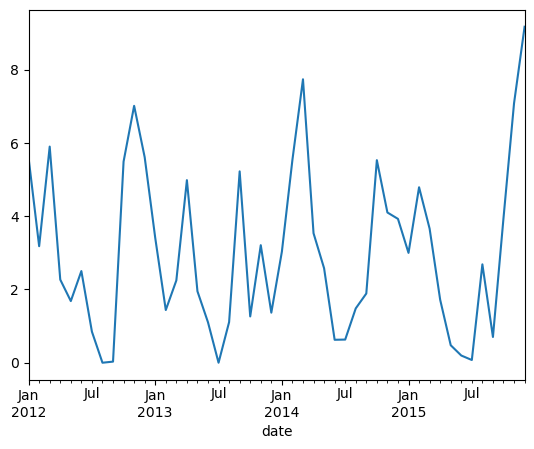

In [20]:
df2.precipitation.resample('m').mean().plot()

## Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<Axes: xlabel='date'>

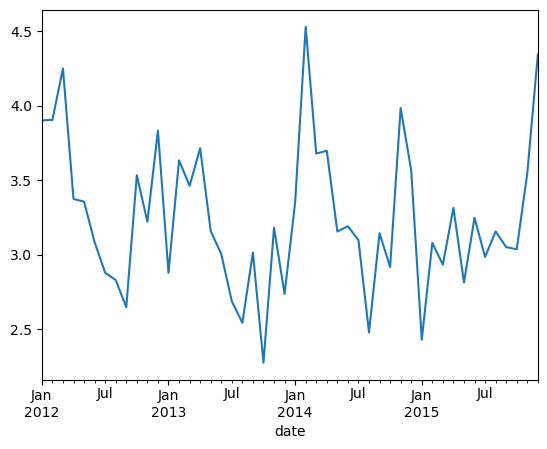

In [21]:
df2.wind.resample('m').mean().plot()

## Which year-month combination is the windiest?

In [22]:
df2.wind.resample('m').sum().idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

## What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [23]:
df2.weather[df2.weather == 'sun'].resample('y').count().idxmax()

Timestamp('2014-12-31 00:00:00', freq='A-DEC')

## In which month does it rain the most?

In [24]:
df2.weather[df2.weather == 'rain'].resample('m').count().idxmax()

Timestamp('2012-11-30 00:00:00', freq='M')

## Which month has the most number of days with a non-zero amount of precipitation?

In [25]:
df2.precipitation[df2.precipitation > 0].resample('m').count().idxmax()

Timestamp('2012-12-31 00:00:00', freq='M')

---

In [26]:
df3 = data.flights_20k()
df3.head()


,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [27]:
df3.date = pd.to_datetime(df3.date)

In [28]:
df3['day'] = df3.date.dt.day_name()

In [29]:
df3['month'] = df3.date.dt.month_name()

In [30]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
 5   day          20000 non-null  object        
 6   month        20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 1.1+ MB


In [31]:
df3 = df3.set_index('date').sort_index()
df3.head()

,delay,distance,origin,destination,day,month
date,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,Monday,January
2001-01-01 06:20:00,0,491,BNA,MCI,Monday,January
2001-01-01 06:30:00,-8,251,MDW,STL,Monday,January
2001-01-01 07:00:00,-10,361,OAK,ONT,Monday,January
2001-01-01 07:00:00,0,303,MSY,HOU,Monday,January


## Use the above dataset for the following exercises:

## Convert any negative delays to 0.

In [32]:
df3['delays_convert'] = df3.delay.apply(lambda x: 0 if x < 0 else x)

In [33]:
df3.delays_convert[df3.delay < 0].value_counts()

0    8482
Name: delays_convert, dtype: int64

In [34]:
df3.delay.isna().sum()

0

## Which hour of the day has the highest average delay?

In [35]:
df3.delay.resample('h').mean().idxmax()

Timestamp('2001-02-23 03:00:00', freq='H')

## Does the day of the week make a difference in the delay amount?

Friday on average has the highest delays.

In [37]:
df3.groupby('day').delay.mean()

day
Friday       15.594452
Monday        3.595973
Saturday      4.667520
Sunday        7.255164
Thursday     10.245766
Tuesday       6.198981
Wednesday     8.161416
Name: delay, dtype: float64

## Does the month make a difference in the delay amount?

February on average has the highest delays.

In [38]:
df3.groupby('month').delay.mean()

month
February    9.398338
January     8.242630
March       6.804310
Name: delay, dtype: float64